<a href="https://colab.research.google.com/github/bigdata210/Python/blob/main/Python%20basis/pandas3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
PATH_DATA="/content/drive/MyDrive/2023/연세IT미래교육원/data/"
air_quality = pd.read_csv(PATH_DATA+"air_quality.csv", encoding="cp949")
air_quality_no2 = air_quality[air_quality["parameter"] == "no2"]
air_quality_no2 = air_quality_no2.rename(columns={"date.utc":"datetime"})
air_quality_no2.head()

,city,country,datetime,location,parameter,value,unit
1825,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,?g/m³
1826,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,?g/m³
1827,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,?g/m³
1828,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,?g/m³
1829,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,?g/m³


In [ ]:
air_quality_no2.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [ ]:
air_quality_no2["datetime"] = pd.to_datetime(air_quality_no2["datetime"])
air_quality_no2["datetime"]

1825   2019-06-21 00:00:00+00:00
1826   2019-06-20 23:00:00+00:00
1827   2019-06-20 22:00:00+00:00
1828   2019-06-20 21:00:00+00:00
1829   2019-06-20 20:00:00+00:00
                  ...           
5267   2019-04-09 06:00:00+00:00
5268   2019-04-09 05:00:00+00:00
5269   2019-04-09 04:00:00+00:00
5270   2019-04-09 03:00:00+00:00
5271   2019-04-09 02:00:00+00:00
Name: datetime, Length: 3447, dtype: datetime64[ns, UTC]

In [ ]:
air_quality_no2["datetime"].min(), air_quality_no2["datetime"].max()

(Timestamp('2019-04-09 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [ ]:
air_quality_no2["datetime"].max() - air_quality_no2["datetime"].min()

Timedelta('72 days 23:00:00')

In [ ]:
air_quality_no2["month"] = air_quality_no2["datetime"].dt.month
air_quality_no2.head()

,city,country,datetime,location,parameter,value,unit,month
1825,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,?g/m³,6
1826,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,?g/m³,6
1827,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,?g/m³,6
1828,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,?g/m³,6
1829,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,?g/m³,6


In [ ]:
air_quality_no2.groupby(
    [air_quality_no2["datetime"].dt.weekday, "location"])["value"].mean()


datetime  location          
0         BETR801               32.489583
          FR04014               29.495417
          London Westminster    29.425439
1         BETR801               30.083333
          FR04014               34.402381
          London Westminster    35.185345
2         BETR801               21.533333
          FR04014               30.130579
          London Westminster    30.121212
3         BETR801               24.615385
          FR04014               28.749378
          London Westminster    29.378723
4         BETR801               24.541667
          FR04014               32.980851
          London Westminster    30.192308
5         BETR801               28.500000
          FR04014               24.955752
          London Westminster    26.995434
6         BETR801               20.514286
          FR04014               24.467917
          London Westminster    26.685590
Name: value, dtype: float64

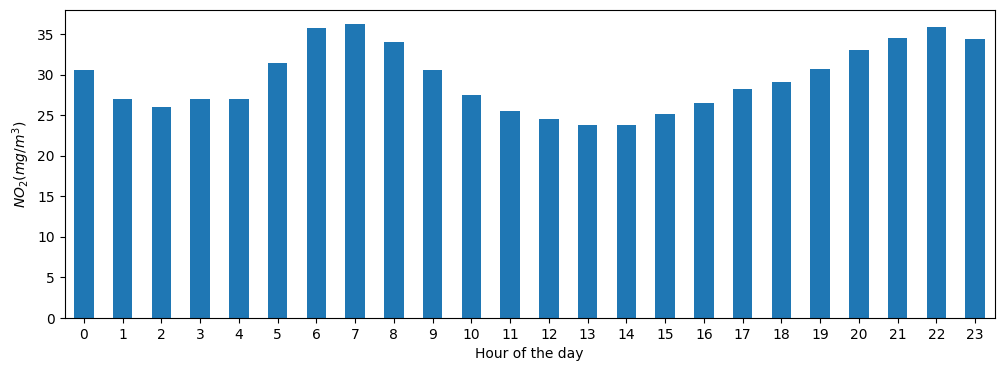

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize =(12,4))

air_quality_no2.groupby(air_quality_no2["datetime"].dt.hour)["value"].mean().plot(
    kind="bar", rot=0, ax=axs
)
plt.xlabel("Hour of the day");
plt.ylabel("$NO_2 (mg/m^3)$");

In [ ]:
# pivot : 주어진 인덱스/열 값으로 구성된 재구성된 DataFrame을 반환
no_2 = air_quality_no2.pivot(index = "datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,54.5,34.2,67.0
2019-04-09 04:00:00+00:00,34.5,48.5,41.0
2019-04-09 05:00:00+00:00,46.5,59.5,41.0


In [ ]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1705),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1705))

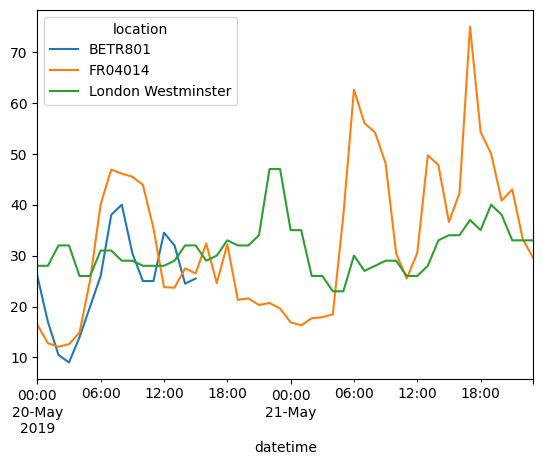

In [ ]:
no_2["2019-05-20":"2019-05-21"].plot();

In [ ]:
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-04-30 00:00:00+00:00,72.5,117.2,84.0
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [ ]:
monthly_max.index.freq

<MonthEnd>

<Axes: xlabel='datetime'>

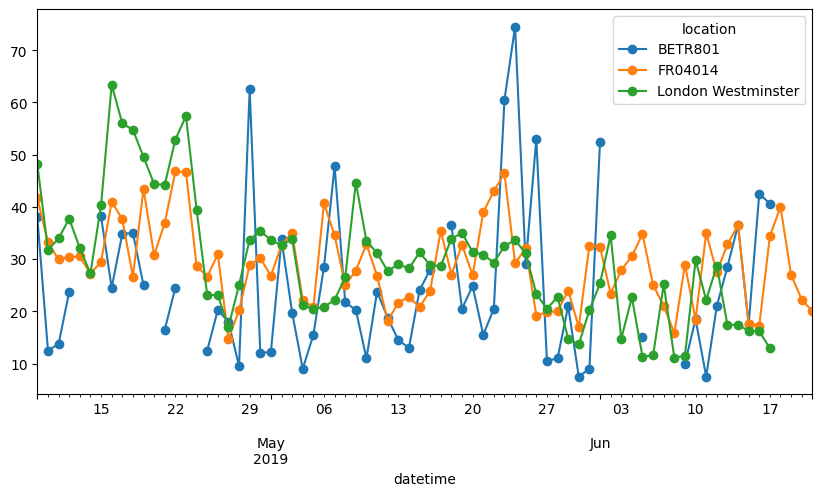

In [ ]:
no_2.resample("D").mean().plot(style="-o", figsize=(10,5))

In [ ]:
PATH_DATA ="/content/drive/MyDrive/2023/연세IT미래교육원/data/"
PATH_DATA

'/content/drive/MyDrive/2023/연세IT미래교육원/data/'

In [ ]:
titanic = pd.read_csv(PATH_DATA + "passenger.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [ ]:
titanic["Name"].str.split(",")

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [ ]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic["Surname"]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 891, dtype: object

In [ ]:
titanic["Name"].str.contains("Countess")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [ ]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


In [ ]:
# 가장 이름이 긴 사람 찾기
# Series.str.len() : 각 이름에 개별적으로 적용
titanic["Name"].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [ ]:
# Series.str.len() : 각 이름에 개별적으로 적용
# idxmax() : 이름 길이가 가장 큰 테이블에서 인덱스 레이블을 가져옴.
titanic["Name"].str.len().idxmax()

307

In [ ]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [ ]:
titanic["Sex_short"] = titanic["Sex"].replace({"male":"M","female":"F"})
titanic["Sex_short"]

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex_short, Length: 891, dtype: object